# **Изпит - Решения**

## **Зад 1. Комплексен логаритъм**

Имплементирайте следната формула:
$$Log(z) = ln|z| + i*arg(z + 2k\pi)$$
- $z$ е комплексно число;
- $a$ е реалната част на $z$, a $b$ e имагинерната част на $z$;
- $|z| = \sqrt{a^2 + b^2}$ е модул на комплексно число;
- $arg(z) = arctan2(\frac{y}{x})$ e аргумент на комплексно число.

*Hint*: използвайте *np.real()* и *np.imag()*

In [3]:
import numpy as np

def Log(z, k=0):
    a = np.real(z)
    b = np.imag(z)
    mod = np.sqrt(a**2 + b**2)
    arg = np.arctan2(b, a)
    return np.log(mod) + 1j*(arg + 2*k*np.pi)

z = 3+4j

if(np.allclose(Log(z) , np.log(z))):
    print("✅ Correct!")
else:
    print("❌ Incorect!")

✅ Correct!


## **Зад 2. Повдигане на матрица на степен**

Повдигнете случайна матрица $50\times50$ на степен $n=100$ възможно най-ефективно.
- *Ограничение*: **Не** може да използвате вградени функции!
- *Hint*: Какво е характеристичен вектор?

In [5]:
import time
import numpy as np

np.random.seed(0)
A = np.random.rand(50, 50)
n = 100

def power(A, n):
    eigvals, eigvecs = np.linalg.eig(A)  
    P = eigvecs
    P_inv = np.linalg.inv(P)
    D_n = np.diag(eigvals**n)
    return np.dot(P, np.dot(D_n, P_inv))

start = time.time()
A_n = power(A, n)
end = time.time()
diff1 = end - start

start = time.time()
A_n = np.eye(A.shape[0])
for _ in range(n):
    A = A @ A
end = time.time()
diff2 = end - start

if(diff2 > diff1):
    print("✅ Correct!")
else:
    print("❌ Incorect!")

✅ Correct!


/tmp/ipykernel_26677/1723570493.py:23: RuntimeWarning: overflow encountered in matmul
  A = A @ A


## **Зад 3. Класификация**

Този код реализира много прост невронен модел за двоична класификация. Нарича се още логистична регресия. Вземат се двумерни входни данни и се опитва да се предскаже дали сумата от двете числа е по-голяма от 0 (т.е. $1$) или **не** (т.е. $0$).

In [72]:
import numpy as np

np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

W = np.random.randn(2, 1)
b = 0
lr = 0.1
epochs = 1000

sigmoid = lambda x: 1 / (1 + np.exp(-x))

for _ in range(epochs):
    a = sigmoid(X.dot(W) + b)
    error = y.reshape(-1,1) - a
    W += X.T.dot(error * a * (1-a)) * lr
    b += (error * a * (1-a)).sum() * lr

pred = (sigmoid(X.dot(W) + b) > 0.5).astype(int)
print(np.mean(pred.flatten() == y))

1.0


Отговорете на следните въпроси:
1) Какво е *входен* и *изходен* слой?
2) Какво е *скрит* слой? Колко неврона има всеки слой?
3) Какво означава *weight* и *bias* в контекста на невронните мрежи?
4) Какво е активираща функция? Коя е активиращата функция в случая?
5) Какво е *forward propagation*? Какво е *backward propagation*?
6) Какво означава *епоха* в контекста на невронните мрежи?

**Примерни отговори:**
1. *Входен слой* - слой, който получава входните данни. *Изходен слой* - слой, който връща прогнозата на модела;
2. *Скрит слой* - слой между входния и изходния, който обработва информацията и извлича характеристики;
   - Входен: 2
   - Скрити: 0 (т.е. няма скрити)
   - Изходен: 1
3. *Weight* - колко важен е всеки вход за изхода, моделът ги научава по време на обучение. *Bias* - позволява на модела да се „мести“ и да предсказва по-добре;
4. *Активираща функция* - функция, която решава дали невронът „ще се активира“ и преобразува линейния резултат в нещо нелинейно. В случая, имаме сигмоидната функция, която преобразува изхода в диапазона $[0,1]$, подходящ за вероятности;
5. *Forward propagation* - данните минават през мрежата и се изчислява изходът. *Backward propagation* - грешката между прогнозата и истинската стойност се използва за актуализиране на weights и bias;
6. *Епоха* - eдно пълно преминаване на всички обучителни данни през мрежата.

## **Зад 4. Метод на Нютон-Рафсън**

Намерете грешките в кода.

``` python
import numpy as np

def f(x):
    return 7*(x**4) + 49*(x**3) + 81*x + 789

def newton_raphson(f, x0, tol=1e-6, max_iter=100, h=1e-5):
    x = x0
    for i in range(max_iter):
        f_prim = (f(x + h) - f(x - h)) / (2 * h)
        if abs(f_prim) < 1e-12:
            return None
        
        x_new = x + f(x) / f_prim
        
        if abs(x_new - x) < tol:
            return x_new
        
        x = x_new
    return None

initial_guesses = np.linspace(-10, 10, 50)
roots = []

for x0 in initial_guesses:
    root = newton_raphson(f, x0)
    if root is not None:
        if not any(np.isclose(root, r, atol=1e-5) for r in roots):
            roots.append(root)

for r in roots:
    print(f"{r:.8f}")
```
``` text
-6.89993217
-2.66295273
```

**Отговор**:
- Формулата на метода на Нютон-Рафсън е:
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

## **Зад 5. Вътрешно произведение**

Кои са свойствата на вътрешното произведение/*inner product*? Преименувайте функциите, така че да съответстват на свойствата. Намерете функция $f(x,y)$, различна от скаларното произведение, която да удовлетворява трите условия.
- *Hint*: Как две променливи се изменят съвместно?

In [80]:
import numpy as np

x_test = np.array([1, 2, 3, 5])
y_test = np.array([1, 2, 4, 6])
w_test = np.array([1, 2, 6, 7])

def f(x, y):
    return np.dot(x,y)

def property_1(f):
    return all(f(x, y) == f(y, x) for x in x_test for y in y_test)

def property_2(f):
    return all(f(x, x) >= 0 for x in x_test)

def property_3_1(f):
    return all(
        f(u + v, w) == f(u, w) + f(v, w) and
        f(u, v + w) == f(u, v) + f(u, w)
        for u in x_test for v in x_test for w in y_test
    )

def property_3_2(f, lam):
    return all(
        f(lam * u, w) == lam * f(u, w) and
        f(u, lam * v) == lam * f(u, v)
        for u in x_test for v in y_test for w in w_test
    )

def property_3(f, lam=2):
    return property_3_1(f) and property_3_2(f, lam)

if property_1(f) and property_2(f) and property_3(f):
    print("✅ Correct!")

✅ Correct!


##### **Примерни отговори:**
``` python
property_1 == is_symmetric
property_2 == is_positive_definite
property_3_1 == check_additivity
property_3_2 == check_homogeneity
property_3 == is_bilinear

# Ковариация
def f(x, y):
    cov_matrix = np.cov(x, y, ddof=0)
    return cov_matrix[0, 1]
```

## **Зад 6. Drunkard's Walk**

Отворете следният [ЛИНК](https://roguebasin.com/index.php/Random_Walk_Cave_Generation) и прочете статията. След това отговорете на следните въпроси:
- Какво представлява алгоритъмът Drunkard’s Walk?
    - Прост алгоритъм за генериране на среди (пещери), при който се извършват случайни стъпки върху карта.
- Какво е основното предимство?
    - Гарантира се напълно свързано ниво с разнообразие от тесни пътеки и отворени пространства.
- Защо е необходимо картата да може да се преоразмерява динамично?
    - Без динамично преоразмеряване алгоритъмът може да достигне ръбовете на картата, което води до неестетични резултати.
- Какво е началното състояние на клетките в картата?
    - Всички клетки първоначално са инициализирани като стени (walls).
- Кога приключва изпълнението на алгоритъма?
    - Когато достатъчен брой клетки са били превърнати в под (floor).
- Използвайки псевдокода от статията, намерете грешките в следната реализация:

``` python
map_width = 50
map_height = 50
map = [['wall' for x in range(map_width)] for y in range(map_height)]

x, y = map_width // 2, map_height // 2
map[y][x] = 'floor'

floor_count = 1 # броим floor, а не wall
target_floor = 500
directions = [(0, -1), (0, 1), (-1, 0),(1, 0)]

while floor_count < target_floor: # не е wall_count
    dx, dy = random.choice(directions)
    x += dx
    y += dy

    if x < 0 or x >= map_width or y < 0 or y >= map_height:
        continue

    if map[y][x] == 'wall': # не е 'floor'
        map[y][x] = 'floor' # не е 'wall'
        floor_count += 1 # не е wall_count
```

## **Зад 7. Явен метод на Ойлер**

- Имплементирайте явния метод на Ойлер за следното ОДУ от първи ред:
  $$ \frac{dy}{dt} = -y + sin(t) \quad y(0)=1.0 \quad t \in (0, 10] \quad h=0.1$$
Може ли да го решите **без** *for*-цикъл?

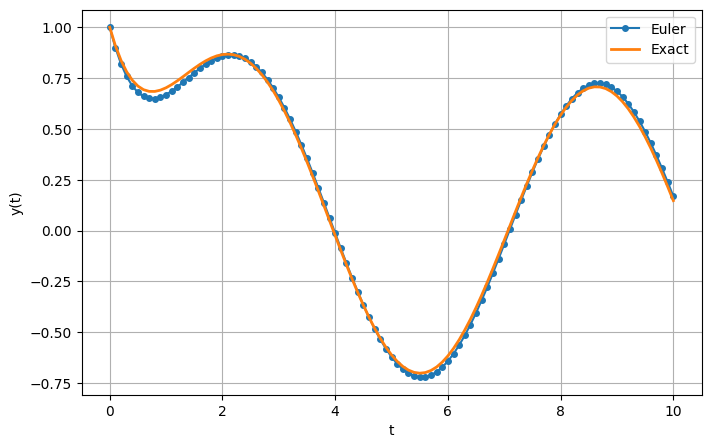

In [95]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return -y + np.sin(t)

def y_exact(t, y0):
    return 0.5*(np.sin(t) - np.cos(t)) + (y0 + 0.5)*np.exp(-t)

y0 = 1.0
t0 = 0.0
t_end = 10.0
h = 0.1

t_values = np.arange(t0, t_end + h, h)
y_values = np.zeros_like(t_values)
y_values[0] = y0

for i in range(1, len(t_values)):
    y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1])

y_values_exact = y_exact(t_values, y0)

plt.figure(figsize=(8,5))
plt.plot(t_values, y_values, 'o-', label="Euler", markersize=4)
plt.plot(t_values, y_values_exact, '-', label="Exact", linewidth=2)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.show()

**Не** може да се реши **без** *for*-цикъл;

## **Зад 8. Комбинаторика**

- Апроксимирайте пермутация, вариация и комбинация **БЕЗ** цикъл или рекурсия. Как ще подобрите точността на резултатите?

*Hint*: Потърсете в интернет.

In [1]:
import math

def stirling_factorial(n: int) -> float:
    if n < 0:
        raise ValueError("n must be non-negative")
    if n == 0 or n == 1:
        return 1.0

    base = math.sqrt(2 * math.pi * n) * (n / math.e) ** n
    correction = 1 + 1 / (12 * n) + 1 / (288 * n**2)
    return base * correction

def factorial_recursive(n: int) -> float:
    if n < 0:
        raise ValueError("n must be non-negative")
    if n == 0 or n == 1:
        return 1
    return n * factorial_recursive(n - 1)

def factorial_iterative(n: int) -> float:
    if n < 0:
        raise ValueError("n must be non-negative")

    result = 1
    for i in range(2, n + 1):
        result *= i
    return result
    
print(stirling_factorial(6), factorial_iterative(6), factorial_recursive(6))

def permutation(n: int) -> float:
    return stirling_factorial(n)
    
def variation(n: int, k: int) -> float:
    if k > n or k < 0:
        raise ValueError("Require 0 <= k <= n")
    return permutation(n) / permutation(n-k)
    
def combination(n: int, k: int) -> float:
    if k > n or k < 0:
        raise ValueError("Require 0 <= k <= n")
    return variation(n, k) / permutation(k)
    
print(permutation(5), variation(5,3), combination(5,3))

720.0088691303329 720 720
120.00254564132182 59.982418291510164 9.996106509571742
